#  Dimensionality Reduction

#### Dimensionality Reduction via
      Principal Component Analysis (PCA)
      Linear Discriminant Analysis / Fisher Discriminant (LDA)
      Kernel Principal Component Analysis (KPCA)


In [98]:
 #Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

In [99]:
import numpy as np
import pandas as pd
import math
# graphics and maths
#Numerical python functions written for compatability with MATLAB commands with the same names.
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.mlab as mlab


### Example 1: Half-moon shapes

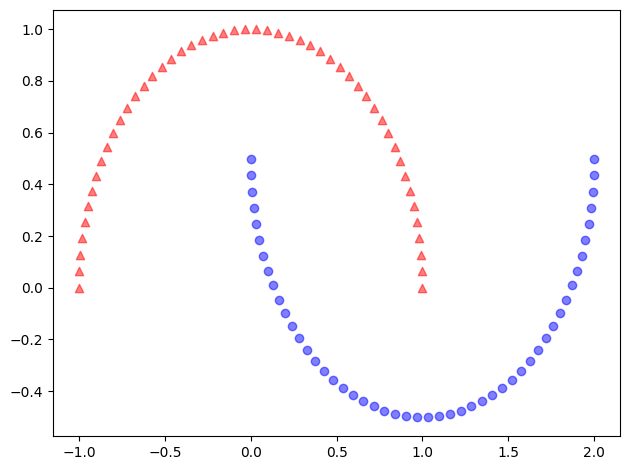

In [100]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

Xtoy, ytoy = make_moons(n_samples=100, random_state=123)

plt.scatter(Xtoy[ytoy == 0, 0], Xtoy[ytoy == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(Xtoy[ytoy == 1, 0], Xtoy[ytoy == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('./figures/half_moon_1.png', dpi=300)
plt.show()

## PCA 

#### The main goal is to project the data onto the most relevant directions.



Eigendecomposition of the covariance matrix allows to find out the directions where the data has the largest spread.

     the eigenvectors are related with these directions
     the eigenvalues are related with the spread of the data on the directions

50
50


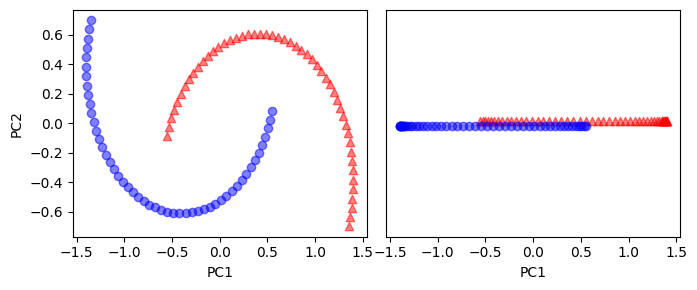

In [101]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_spca = pca.fit_transform(Xtoy)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[ytoy == 0, 0], X_spca[ytoy == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[ytoy == 1, 0], X_spca[ytoy == 1, 1],
              color='blue', marker='o', alpha=0.5)
inx=sum(ytoy==0)
print(inx)
ax[1].scatter(X_spca[ytoy == 0, 0], np.zeros((inx, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
inx=sum(ytoy==0)
print(inx)
ax[1].scatter(X_spca[ytoy == 1, 0], np.zeros((inx, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('./figures/half_moon_2.png', dpi=300)
plt.show()

#Para passar da esquerda para a direita usamos PCA
#Para passar da esquerda para o grafico do kernel usamos Kernel PCA

### Questions
1. Interpret the code. what is represented on the figures.
2. Reducing the dimension to one. With this projection is possible to discriminate between blue and red examples?
3. What are the directions to project the data?

In [102]:
##### 
#print(Xtoy[0:2,:])
#print(X_spca[0:2,:])
#print(X_spca.shape)
#aa=pca.inverse_transform(X_spca[0:2,:])
#print(aa)
# The eigenvectors
print('eigenvectors\n', pca.components_)
# singular values
print('singular_ values\n', pca.singular_values_)

eigenvectors
 [[-0.95176645  0.30682345]
 [ 0.30682345  0.95176645]]
singular_ values
 [9.05666096 4.24772997]


## Kernel PCA

#### Mapping the data and projecting the mapped data.  Goal: 
 to find projections of the data that makes data linearly separable.


50
50


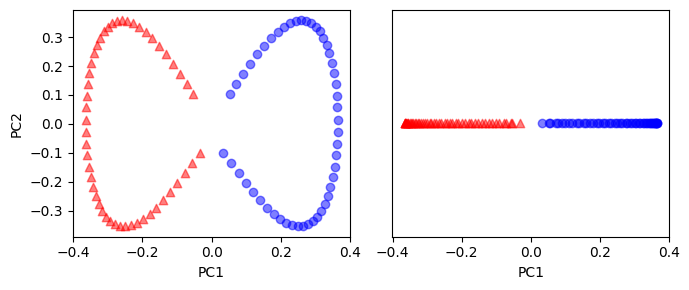

In [103]:
from sklearn.decomposition import KernelPCA


kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_spca = kpca.fit_transform(Xtoy)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[ytoy == 0, 0], X_spca[ytoy == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[ytoy == 1, 0], X_spca[ytoy == 1, 1],
              color='blue', marker='o', alpha=0.5)
inx=sum(ytoy==0)
print(inx)
ax[1].scatter(X_spca[ytoy == 0, 0], np.zeros((inx, 1)) ,
              color='red', marker='^', alpha=0.5)
inx=sum(ytoy==0)
print(inx)
ax[1].scatter(X_spca[ytoy == 1, 0], np.zeros((inx, 1)),
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('./figures/circles_2.png', dpi=300)
plt.show()

## Question

1.  Interpret the results.
2.  Which kernel was used?
3.  Reducing the dimension to one. With this projection is possible to discriminate between blue and red examples?

## LDA - Linear discriminant Analysis 

####  Reduction of the dimensionality of the input by projecting it to the most discriminative directions
* Large distance between classes
* Small variance within class



50
50


(Text(0.5, 0, 'PC1'), ([], []))

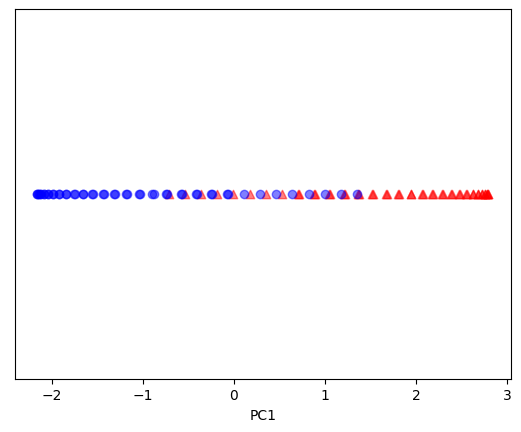

In [104]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# optimization with Fisher discriminant principles
lda = LinearDiscriminantAnalysis(solver='eigen')
X_lda= lda.fit_transform(Xtoy, ytoy)

inx=sum(ytoy==0)
print(inx)
plt.scatter(X_lda[ytoy == 0, 0], np.zeros((inx, 1)) ,
              color='red', marker='^', alpha=0.5)
inx=sum(ytoy==0)
print(inx)
plt.scatter(X_lda[ytoy == 1, 0], np.zeros((inx, 1)),
              color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1'), plt.yticks([])

In [105]:
# Direction to project the data
print(lda.coef_)

[[ 1.96078431 -7.39719457]]


### Example 2: Separating concentric circles

Try PCA and Kernel PCA. And interpret results.

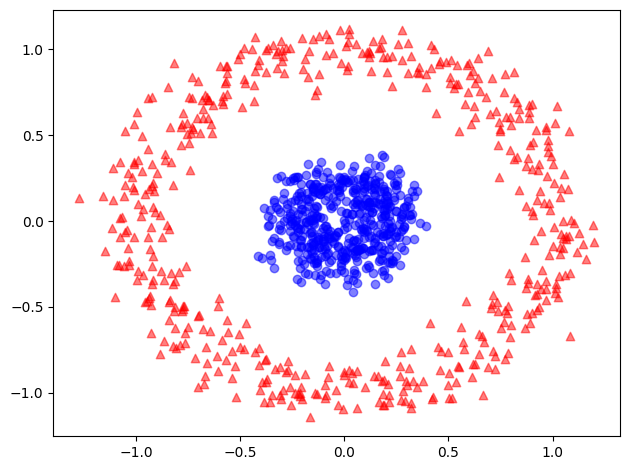

In [106]:
from sklearn.datasets import make_circles

Xtoy, ytoy = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(Xtoy[ytoy == 0, 0], Xtoy[ytoy == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(Xtoy[ytoy == 1, 0], Xtoy[ytoy == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('./figures/circles_1.png', dpi=300)
plt.show()

### Example 3: Real data.
1. Reading a data set.
2. Two  processing blocks  before the classifier.

In [107]:
df = pd.read_csv("wdbcBBB.csv",header = 0)
df.head()

,ID,diagnosis,r-mean,t-mean,per-mean,ar-mean,sm-mean,cm-mean,cn-mean,nc-mean,...,r-w,t-w,per-w,ar-w,sm-w,cm-w,cn-w,nc-w,sym-w,fc-w
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [108]:
df.drop('ID',axis=1,inplace=True)
print(df.diagnosis.unique())
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})


['M' 'B']


#### Prepare the data for a classification task

In [109]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

dummy=df.values
y=dummy[:,0]
X=dummy[:,1:]
# features
#X=df[1:].values
print(dummy.shape)
print(y.shape)
print(X.shape)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

(569, 31)
(569,)
(569, 30)


C:\Users\TiagoC\AppData\Local\Temp\ipykernel_19240\2853133195.py:1: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if Version(sklearn_version) < '0.18':


### Transform the data : zero mean an variance one


# Question:
Interpret the procedure to standardize the data.


**Comment**
 the correct way is to re-use parameters from the training set if we are doing any kind of transformation -- the test set should basically stand for "new, unseen" data.

In [110]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## PCA

In [111]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

pca.explained_variance_ratio_

array([4.36893153e-01, 1.94151626e-01, 9.66154484e-02, 6.71661075e-02,
       5.49883033e-02, 4.01225718e-02, 2.18306816e-02, 1.48922601e-02,
       1.37410827e-02, 1.10137130e-02, 1.04826288e-02, 9.16214247e-03,
       7.66306051e-03, 5.14226331e-03, 3.19635178e-03, 2.51968451e-03,
       1.92415148e-03, 1.65844223e-03, 1.49026749e-03, 1.06777316e-03,
       1.01725216e-03, 8.48954816e-04, 7.43492725e-04, 5.81295611e-04,
       5.44222785e-04, 2.53545469e-04, 2.14385701e-04, 4.62967124e-05,
       2.51158320e-05, 3.72534805e-06])

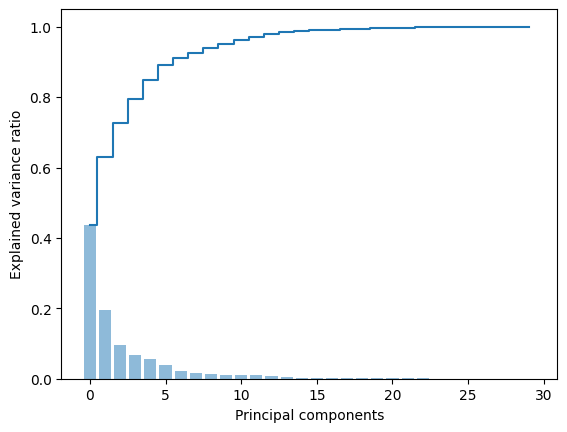

In [112]:
plt.bar(range(30), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(30), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

# Dimension reduction before classification


In [113]:
# Only two components for illustration
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
print(pca)

PCA(n_components=2)


### Question:
1. With two components what is the explained variance kept by two projections.

In [114]:
X_test_pca = pca.transform(X_test_std)

### Question:
Explain data manipulations in train and test sets.

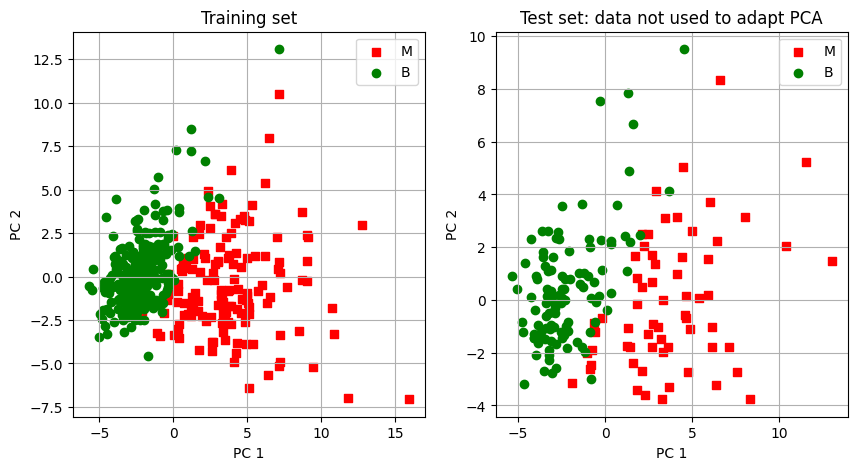

In [115]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()   
ax = axes[0]
ax.figure
inx=(y_train==1)
inx=inx.ravel()
ax.scatter(X_train_pca[inx,0],X_train_pca[inx,1],marker='s',color='r',label='M')  

inx=(y_train==0)
inx=inx.ravel()
ax.scatter(X_train_pca[inx,0],X_train_pca[inx,1],marker='o',color='g',label='B')    
ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()
#plt.show()
 

ax = axes[1]
ax.figure
inx=(y_test==1)
inx=inx.ravel()
ax.scatter(X_test_pca[inx,0],X_test_pca[inx,1],marker='s',color='r',label='M')  
inx=(y_test==0)
inx=inx.ravel()
ax.scatter(X_test_pca[inx,0],X_test_pca[inx,1],marker='o',color='g',label='B')
    
ax.set_title("Test set: data not used to adapt PCA")    

ax.legend() 
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### Questions:
A classififier  with the Principal components of the data.

1. How many atributes are in the input of the classifier?

2. How the attributes can be related with the raw data?
 

3. Try to use a Kernel PCA and LDA


<br>
<br>